# Using Gurobi and Integer Linear Programming

<br>
In this notebook, you will learn the basics of linear programming in its simplest form while also getting a taste of interacting with the Gurobi Python API. This example is somewhat adapted from Gurobi, and there's some extra documentation to make learning the formalism less of a headache. This notebook assumes that Gurobi is properly installed with a valid license.

[Gurobi's Examples](https://www.gurobi.com/documentation/9.5/examples/example_tour.html)

[Read Here!](https://en.wikipedia.org/wiki/Integer_programming)


### Creating a Model
<br>
The Model object in Gurobi contains all the information regarding a linear programming problem. All variables and constraints are initialized inside this 'unsolved' state. Once we eventually solve said problem, the solved state of the model can be queried for attributes.

In [1]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("2D Optimization")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-05


Linear programming problems maximize a linear objective function of a set of variables subject to a set of linear constraints. By utilizing simple functions, we can use solvers like Gurobi to organize problems with even millions of variables! As you will see in the scheduling tutorial, these variables can have unique and often clever 'physical' interpretations. 

In this example, we'll solve a system with just two variables (perhaps cartesian coordinates). This allows us to visualize the problem geometrically and get some intuition about linear programming. Say we wish to maximize the objective function (a *vector* in our 2 dimensional space):
<br>
<center>$x + 2y$</center>
subject to the system of matrix inequalities:
<br>
<center>$x + 2y \leq 4$</center>
<center>$x + y \geq 1$</center>
<br>



### Variables

We initialize these in Gurobi using the addVar function. We need to specify the bounds of the parameters we will solve over using the built in variable types. In this example, we'll choose to only accept binary values. Variables can also take other forms, but these are generally the most useful. We specify the type of variable and assign it a name. Naming variables explicitly is important for querying later on.

In [2]:
# Create variables
x = m.addVar(vtype=GRB.BINARY, name="x")
y = m.addVar(vtype=GRB.BINARY, name="y")

### Constraints

Initializing constraints is similarly easy in Gurobi using the addConstr function. We specify the linear expression of our variables and again give it a convenient name. In our toy 2D model, it's fairly easy to visualize everything geometrically. Our constraints take the forms of lines that bound all of our feasible solutions.

In [3]:
# Add constraint: x + 2 y <= 4
m.addConstr(x + 2 * y <= 4, "c0")

# Add constraint: x + y >= 1
m.addConstr(x + y >= 1, "c1")

<gurobi.Constr *Awaiting Model Update*>

We can visualize using a 2D plot:

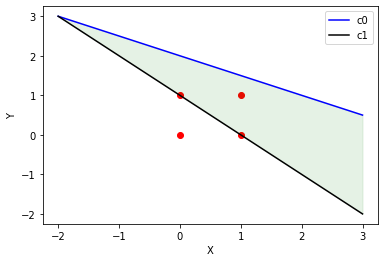

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots()


#Our x and y can take only binary values
axs.scatter([0,0,1,1],[0,1,0,1],color = 'r')
X = np.arange(-2,4)

#Plot Constraints
c0Y = (4-X)/2
c1Y = 1-X

axs.plot(X,c0Y,label='c0',color='b')
axs.plot(X,c1Y,label='c1',color='black')
axs.fill_between(X,c1Y,c0Y,alpha=.1,color='g')

axs.set_xlabel('X')
axs.set_ylabel('Y')
plt.legend()

### Objective

The setObjective function accepts another linear expression to optimize and an accompanying condition (i.e. maximize or minimize). We want to find the point on the surfaces of our planes that sits at the maximum of our objective function. Then, we need to find the nearest integer solutions for our variables (or in this case solution with only *binary* parameters).

In [5]:
# Set objective
m.setObjective(x + 2 * y, GRB.MAXIMIZE)

We seek the combination of parameters that has maximal projection along the objective vector. By inspection, this looks like the point $(1,1)$ below. We can also see that the point $(0,0)$ would not be considered a valid solution.

Text(1, 2.3, 'Obj')

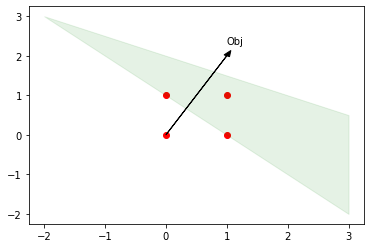

In [6]:
fig, axs = plt.subplots()

axs.scatter([0,0,1,1],[0,1,0,1],color = 'r')
axs.fill_between(X,c1Y,c0Y,alpha=.1,color='g')

axs.arrow(0,0,1,2,color='black',head_width = .1)
axs.text(1,2.3,'Obj')

Finally we call the optimize function. You can call this assuming you have enough constraints to bound your solution space and the objective is specified. The most common algorithm for solving ILP problems is the simplex algorithm. For larger problems, Gurobi will also attempt other methods and use what seems to be fastest.

[Simplex Algorithm](https://en.wikipedia.org/wiki/Simplex_algorithm)

In [7]:
# Optimize model
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x4cef9fec
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 3.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


### Solution

Gurobi's console output above contains statistics about the solving method and problem size. You will explore this in more depth in the scheduling tutorial. For now, let's just get our solution. We can query a completed model for variable values, optimization status and more.

In [8]:
# .VarName returns the assigned name, .X returns the calculated value from optimization
for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % m.ObjVal)

x 1
y 1
Obj: 3


As we expected, our best value of the objective subject to our matrix constraints and variable bounds occurs at $(1,1)$. For scheduling, we rarely even care about the actual value of our abstract *objective*, only the parameters that achieve it!